<a href="https://colab.research.google.com/github/agrisB/ColabFiles/blob/main/FROST4_degreedays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_degreedays


In [ ]:
pip install plotly==4.14.3

     |████████████████████████████████| 13.2MB 213kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly
print(plotly.__version__)

4.14.3


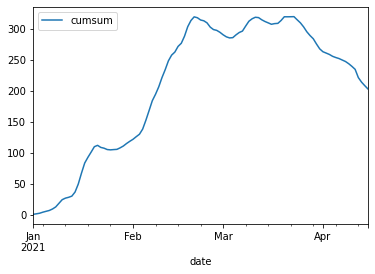

In [ ]:
import pandas as pd

df_a = pd.read_excel('/content/lvgmc_temp_nokr_2.xls', sheet_name=0,skiprows=[0])

df_a['Datums \ Laiks'] = pd.to_datetime(df_a['Datums \ Laiks'].astype(str), format='%d.%m.%Y')
df_a = df_a.set_index('Datums \ Laiks')
df_a.columns = pd.to_timedelta(df_a.columns + ':00')
df_a = df_a.stack()
df_a.index = df_a.index.get_level_values(0) + df_a.index.get_level_values(1)
df_a = df_a.reset_index()
df_a.columns = ['date','air_temp']

# # filename = 'temperature_sample.xls'
# # df_temp = pd.read_excel(filename)
# df_temp = df_a.set_index('date')
# ts_temp = df_temp['air_temp']#.reset_index()

# ts_temp

# # from pandas_degreedays import inter_lin_nan
# # ts_temp = inter_lin_nan(ts_temp, '1H') # interpolates linearly NaN

# from pandas_degreedays import calculate_dd
# df_degreedays = calculate_dd(ts_temp, method='meteo', typ='cooling', Tref=0.0, group='weekly')

# # from pandas_degreedays import plot_temp
# # plot_temp(ts_temp, df_degreedays)


df_min = df_a.set_index('date').resample('D').min().reset_index()

df_max = df_a.set_index('date').resample('D').max().reset_index()

df_max.columns = ['date', 'Tmax']
df_min.columns= ['date', 'Tmin']

df_fi = pd.concat([df_max, df_min.Tmin], axis = 1)
df_fi['mean'] = (df_fi['Tmax']+ df_fi['Tmin'])/2

df_fi['cumsum'] = df_fi['mean'].cumsum().multiply(-1)

df_fi

lines = df_fi.plot.line(x='date', y='cumsum')

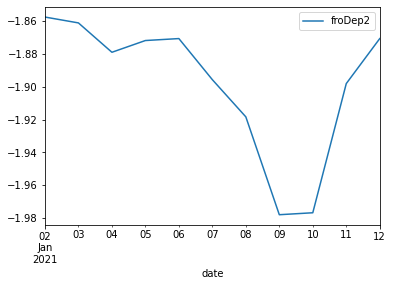

In [ ]:


df_fi['froDep'] = df_fi['mean']**0.5

df_fi['froDep2'] = 0.0238*df_fi['mean']- 1.8386

df_cl5 = df_fi[(df_fi['date'] > '2021-01-01') & (df_fi['date'] < '2021-01-13')]

df_fi

lines = df_cl5.plot.line(x='date', y='froDep2')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import plotly
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.express as px

import os
import glob


df_5 = pd.read_excel('/content/lvgmc_soilt5.xls', sheet_name=0,skiprows=[0])
df_20 = pd.read_excel('/content/lvgmc_soilt20.xls', sheet_name=0,skiprows=[0])
df_a = pd.read_excel('/content/lvgmc_airtemp.xls', sheet_name=0,skiprows=[0])
# df_p = pd.read_excel('/content/lvgmc_temp_nokr_2.xls', sheet_name=0,skiprows=[0])
df_s = pd.read_excel('/content/lvgmc_sniegs.xls', sheet_name=0,skiprows=[0])


df_5['Datums \ Laiks'] = pd.to_datetime(df_5['Datums \ Laiks'].astype(str), format='%d.%m.%Y')
df_5 = df_5.set_index('Datums \ Laiks')
df_5.columns = pd.to_timedelta(df_5.columns + ':00')
df_5 = df_5.stack()
df_5.index = df_5.index.get_level_values(0) + df_5.index.get_level_values(1)
df_5 = df_5.reset_index()
df_5.columns = ['date','temp_5']

df_20['Datums \ Laiks'] = pd.to_datetime(df_20['Datums \ Laiks'].astype(str), format='%d.%m.%Y')
df_20 = df_20.set_index('Datums \ Laiks')
df_20.columns = pd.to_timedelta(df_20.columns + ':00')
df_20 = df_20.stack()
df_20.index = df_20.index.get_level_values(0) + df_20.index.get_level_values(1)
df_20 = df_20.reset_index()
df_20.columns = ['date','temp_20']

df_a['Datums \ Laiks'] = pd.to_datetime(df_a['Datums \ Laiks'].astype(str), format='%d.%m.%Y')
df_a = df_a.set_index('Datums \ Laiks')
df_a.columns = pd.to_timedelta(df_a.columns + ':00')
df_a = df_a.stack()
df_a.index = df_a.index.get_level_values(0) + df_a.index.get_level_values(1)
df_a = df_a.reset_index()
df_a.columns = ['date','air_temp']

# df_p['Datums \ Laiks'] = pd.to_datetime(df_p['Datums \ Laiks'].astype(str), format='%d.%m.%Y')
# df_p = df_p.set_index('Datums \ Laiks')
# df_p.columns = pd.to_timedelta(df_p.columns + ':00')
# df_p = df_p.stack()
# df_p.index = df_p.index.get_level_values(0) + df_p.index.get_level_values(1)
# df_p = df_p.reset_index()
# df_p.columns = ['date','Nokrisni']

df_s['Datums \ Laiks'] = pd.to_datetime(df_s['Datums \ Laiks'].astype(str), format='%d.%m.%Y')
df_s = df_s.set_index('Datums \ Laiks')
df_s.columns = pd.to_timedelta(df_s.columns + ':00')
df_s = df_s.stack()
df_s.index = df_s.index.get_level_values(0) + df_s.index.get_level_values(1)
df_s = df_s.reset_index()
df_s.columns = ['date','Sniega segas biezums']

print(len(df_5["temp_5"]), " 5cm depth")
print(len(df_20["temp_20"]), " 20cm depth")
print(len(df_a["air_temp"]), " Air Temp")
print(len(df_s["Sniega segas biezums"]), " Snow depth")

comb3 = pd.merge(df_20,df_5,on='date',how='left')
comb3 = pd.merge(comb3,df_a,on='date',how='left')

correlation_df = comb3.corr()

print('')
print(correlation_df)



fig = go.Figure()

fig.add_trace(go.Scatter(x=df_5["date"], y=df_5["temp_5"], mode='lines', name='temp_5'))

fig.add_trace(go.Scatter(x=df_20["date"], y=df_20["temp_20"], mode='lines', name='temp_20'))

fig.add_trace(go.Scatter(x=df_a["date"], y=df_a["air_temp"], mode='lines', name='air_temp'))

# fig.add_trace(go.Scatter(x=df_p["date"], y=df_p["Nokrisni"], mode='lines', name='Nokrisni'))

fig.add_trace(go.Scatter(x=df_s["date"], y=df_s["Sniega segas biezums"], mode='lines', name='Sniega segas biezums'))


fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Temperature, C°')
fig.layout.template = 'plotly_white'
fig.update_layout(autosize=False, width=1400, height=600)
fig.update_xaxes(showline=True,mirror=True)
fig.update_yaxes(showline=True,mirror=True)

fig.show()

1774  5cm depth
1671  20cm depth
1774  Air Temp
1776  Snow depth

           temp_20    temp_5  air_temp
temp_20   1.000000  0.904385  0.819323
temp_5    0.904385  1.000000  0.953435
air_temp  0.819323  0.953435  1.000000
